# MNIST Data Set - Basic Approach

### Get the MNIST Data

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

** Alternative sources of the data just in case: **

* http://yann.lecun.com/exdb/mnist/
* https://github.com/mrgloom/MNIST-dataset-in-different-formats

In [5]:
#28X28 images are flattened and stored as an array of 784 pixel values
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.images.shape

(10000, 784)

In [9]:
mnist.validation.images.shape

(5000, 784)

In [10]:
mnist.train.images[100].shape

(784,)

In [11]:
mnist.train.images[1].min()

0.0

In [12]:
mnist.train.images[1].max()

1.0

### Visualizing the Data

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

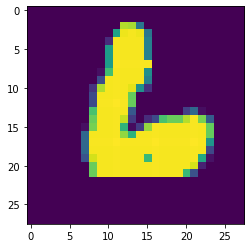

In [14]:
plt.imshow(mnist.train.images[3523].reshape(28,28))

In [15]:
batch_x , batch_y = mnist.train.next_batch(5000)

In [16]:
batch_x.shape

(5000, 784)

In [17]:
batch_y.shape

(5000, 10)

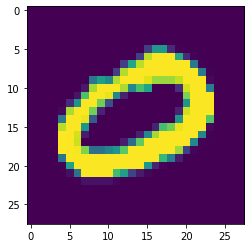

In [18]:
plt.imshow(batch_x[1235].reshape(28,28))

In [19]:
batch_y[1235]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
print(batch_y[1235].argmax())

0


## Create the Model

In [21]:
#Input Layer

In [22]:
#placeholder to read and feed images at run time
x = tf.placeholder(tf.float32,shape=[None,784])

#placeholde to feed the labels at runtime
y_true = tf.placeholder(tf.float32,[None,10])

In [23]:
#Hidden Layer of 10 neurons

In [24]:
# 10 sets of 784 weights
W = tf.Variable(tf.zeros([784,10]))

#10 biases - one for each neuron
b = tf.Variable(tf.zeros([10]))

# Net input function
I = tf.matmul(x,W) + b 

#activation function - Softmax
Output=tf.nn.softmax(I)

Instructions for updating:
Colocations handled automatically by placer.


Loss and Optimizer

In [25]:
#define loss function

In [26]:
individual_loss=tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=Output)
loss_function = tf.reduce_mean(individual_loss)

In [27]:
#optimize the loss using gradient descent optimizer

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [29]:
train = optimizer.minimize(loss_function)

### Create Session

In [30]:
init = tf.global_variables_initializer()

In [31]:
sess=tf.Session()
sess.run(init)

In [32]:
#training
for step in range(10000):
        
        batch_x , batch_y = mnist.train.next_batch(200)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [33]:
#pass the test data through the model
#NOTE: There will be no iteration for test 
predict=sess.run(Output,feed_dict={x:mnist.test.images})

In [34]:
#output of 10,000 images
#predict.shape

In [35]:
#argmax will give the predicted value in terms of a number 
result=sess.run(tf.argmax(predict,1))

In [36]:
#predicted values
result

array([7, 2, 1, ..., 4, 8, 6], dtype=int64)

In [37]:
#same way get the label value using argmax
label_number=tf.argmax(mnist.test.labels,1)
labels=sess.run(label_number)

In [38]:
labels

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [39]:
accuracy_score(result,labels)

0.9258

In [40]:
confusion_matrix(result,labels)

array([[ 961,    0,   13,    2,    2,   10,   10,    3,    4,   11],
       [   0, 1105,    1,    0,    2,    3,    3,    7,    4,    5],
       [   2,    2,  914,   23,    3,    4,    4,   25,    4,    3],
       [   2,    6,   11,  924,    1,   33,    2,    6,   16,   11],
       [   1,    1,   16,    1,  920,   13,    8,    8,    8,   22],
       [   1,    2,    4,   19,    0,  760,   12,    0,   19,   14],
       [  10,    4,   12,    3,   12,   15,  915,    0,   11,    0],
       [   1,    2,   14,   10,    2,   11,    1,  953,   15,   16],
       [   2,   13,   39,   19,    3,   34,    3,    5,  890,   11],
       [   0,    0,    8,    9,   37,    9,    0,   21,    3,  916]],
      dtype=int64)

In [41]:
#Run inference to test the model 

In [42]:
#test with a single image
#fetch one image
test_image,test_label=mnist.test.next_batch(1) 

In [43]:
#type(test_image)

In [44]:
#run inference    

predicted_number=tf.argmax(Output,1)
print("Predicted Number:")
print(sess.run(predicted_number,feed_dict={x:test_image}))

Predicted Number:
[3]


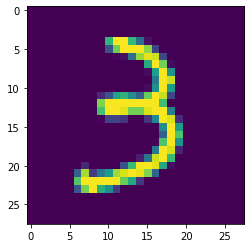

In [45]:
#display the image
plt.imshow(test_image.reshape(28,28))

In [ ]:
0